##Импорты

In [109]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

##Работа с датасетом

In [121]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [123]:
len(y_train), len(y_test)

(60000, 10000)

Посмотрим данные

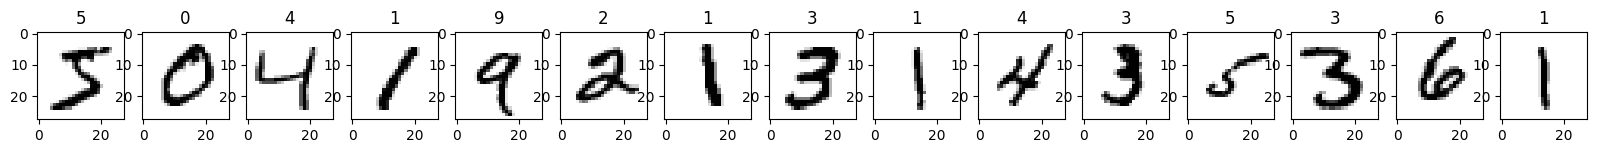

In [124]:
fig, axis = plt.subplots(1, 15, figsize=(20, 10))
images, labels = X_train[:15], y_train[:15]

for i, ax in enumerate(axis.flat):
      image, label = images[i], labels[i]

      ax.imshow(image.view(28, 28), cmap='binary')
      ax.set(title = f"{label}")

In [125]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()
X_train.shape

torch.Size([60000, 1, 28, 28])

##Строим LeNet5

In [148]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5,
            padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5,
            padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()

        self.fc3   = torch.nn.Linear(84, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

##Обучение сетки

In [159]:
lenet5 = LeNet5()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

learning_rate = 1.0e-4
loss = torch.nn.CrossEntropyLoss()

# optimizer = torch.optim.Adam(lenet5.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(lenet5.parameters(), lr=learning_rate)
optimizer = torch.optim.RMSprop(lenet5.parameters(), learning_rate)

batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(50):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(f"Epoch: {epoch}.  Accuracy: {np.array(accuracy)}")

Epoch: 0.  Accuracy: 0.943399965763092
Epoch: 1.  Accuracy: 0.9695999622344971
Epoch: 2.  Accuracy: 0.9759999513626099
Epoch: 3.  Accuracy: 0.9802999496459961
Epoch: 4.  Accuracy: 0.9799000024795532
Epoch: 5.  Accuracy: 0.9821999669075012
Epoch: 6.  Accuracy: 0.9847999811172485
Epoch: 7.  Accuracy: 0.9848999977111816
Epoch: 8.  Accuracy: 0.9839999675750732
Epoch: 9.  Accuracy: 0.9876999855041504
Epoch: 10.  Accuracy: 0.9871999621391296
Epoch: 11.  Accuracy: 0.9871999621391296
Epoch: 12.  Accuracy: 0.9874999523162842
Epoch: 13.  Accuracy: 0.9870999455451965
Epoch: 14.  Accuracy: 0.9875999689102173
Epoch: 15.  Accuracy: 0.9887999892234802
Epoch: 16.  Accuracy: 0.9874999523162842
Epoch: 17.  Accuracy: 0.986299991607666
Epoch: 18.  Accuracy: 0.9887999892234802
Epoch: 19.  Accuracy: 0.988099992275238
Epoch: 20.  Accuracy: 0.9873999953269958
Epoch: 21.  Accuracy: 0.986799955368042
Epoch: 22.  Accuracy: 0.9890999794006348
Epoch: 23.  Accuracy: 0.988099992275238
Epoch: 24.  Accuracy: 0.9869999

In [ ]:
lenet5.forward(X_test)

In [ ]:
plt.plot(test_loss_history);

In [ ]:
plt.plot(test_accuracy_history);

##ADAM

In [152]:
# Данные от обучения Adam
adam_10_4_loss = test_loss_history
adam_10_4_acc = test_accuracy_history

##SGD

In [157]:
# Данные от обучения SGD
SGD_loss = test_loss_history
SGD_acc = test_accuracy_history

##RMSprop

In [160]:
# Данные от обучения RMSprop
RMSprop_loss = test_loss_history
RMSprop_acc = test_accuracy_history

##Преобразование в numpy для отображения

In [161]:
# Преобразуем в numpy
adam_10_4_loss_np = np.array(adam_10_4_loss)
adam_10_4_acc_np= np.array(adam_10_4_acc)

SGD_loss_np = np.array(SGD_loss)
SGD_acc_np = np.array(SGD_acc)

RMSprop_loss_np = np.array(RMSprop_loss)
RMSprop_acc_np = np.array(RMSprop_acc)

## Оригинальная версия версия сетки на tanh и Average Pooling. Везде использовался одинаковый lr = 10^-4

Графики лоссов

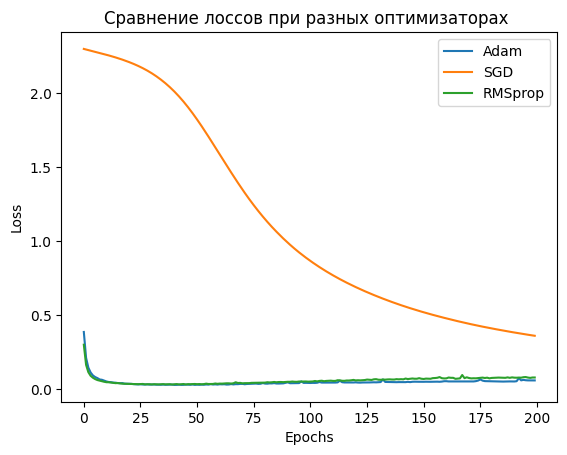

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = {
'Adam': adam_10_4_loss_np,
'SGD': SGD_loss_np,
'RMSprop': RMSprop_loss_np
}

loss_plot = pd.DataFrame(data_frame, columns=['Adam', 'SGD', 'RMSprop'])

loss_plot.plot.line()

plt.title('Сравнение лоссов при разных оптимизаторах ')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

Графики Accuracy

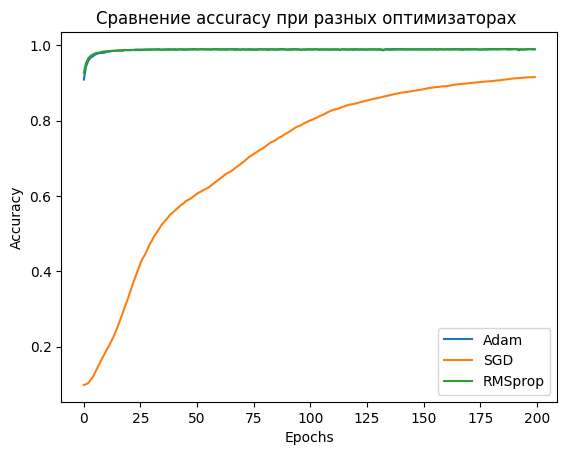

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = {
'Adam': adam_10_4_acc_np,
'SGD': SGD_acc_np,
'RMSprop': RMSprop_acc_np
}

acc_plot = pd.DataFrame(data_frame, columns=['Adam', 'SGD', 'RMSprop'])

acc_plot.plot.line()

plt.title('Сравнение accuracy при разных оптимизаторах ')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.show()

## Модернизированная версия. На ReLU и MaxPooling.
LR:
- Adam 10^-4
- SGD 10^-3
- RMSprop 10^-4

Графики лоссов

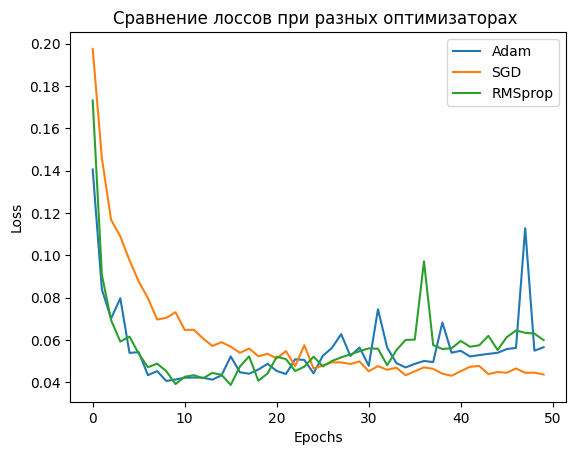

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = {
'Adam': adam_10_4_loss_np,
'SGD': SGD_loss_np,
'RMSprop': RMSprop_loss_np
}

loss_plot = pd.DataFrame(data_frame, columns=['Adam', 'SGD', 'RMSprop'])

loss_plot.plot.line()

plt.title('Сравнение лоссов при разных оптимизаторах ')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

Графики Accuracy

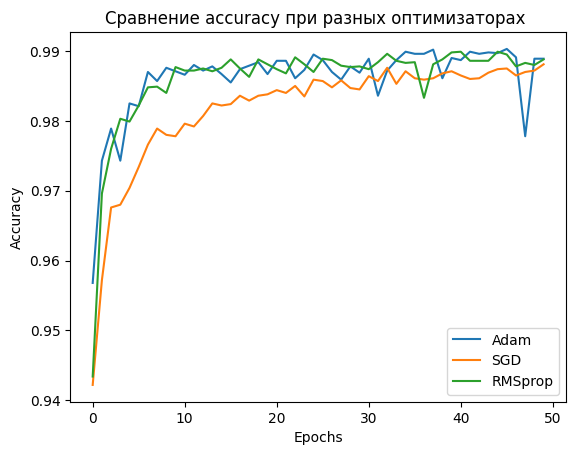

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

data_frame = {
'Adam': adam_10_4_acc_np,
'SGD': SGD_acc_np,
'RMSprop': RMSprop_acc_np
}

acc_plot = pd.DataFrame(data_frame, columns=['Adam', 'SGD', 'RMSprop'])

acc_plot.plot.line()

plt.title('Сравнение accuracy при разных оптимизаторах ')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.show()